## Hyperparameters

- It is a very common thing to need to try out a bunch of different values for your hyperparameters and so scikit-learn provides us with some tools to help out.

<AxesSubplot:xlabel='x1', ylabel='x2'>

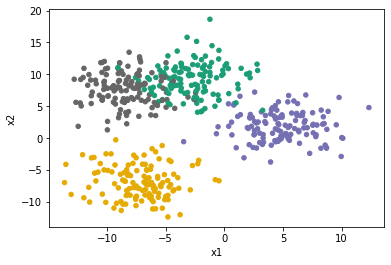

In [1]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

X, y = make_blobs(n_samples=500, centers=4, cluster_std=2.5, random_state=42)
X = pd.DataFrame(X, columns=["x1", "x2"])

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

X.plot.scatter("x1", "x2", c=y, colormap="Dark2", colorbar=False)

## GridSearchCV
允許我們進行超參數搜索的工具稱為 GridSearchCV，它將為我們傳遞的每個可能的超參數重新運行模型訓練，在這種情況下，我們要求它嘗試 n_neighbors 從 1 到 49 的每個值，它會使用訓練數據來選擇最佳值。

- GridSearchCV 構造函數需要做兩件事：

1. 我們想要探索的模型
2. 包含我們要測試的超參數值的字典

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters = {"n_neighbors" : range(1, 50)
             }

clf = GridSearchCV(KNeighborsClassifier(), parameters).fit(train_X, train_y)

- 我們可以通過獲取 GridSearchCV 的 cv_results_ 屬性並根據 n_neighbors 的值繪製 mean_test_score 來做到這一點。 GridSearchCV 將使用不同的訓練和驗證數據拆分多次運行每個實驗，以提供分數不確定性的一些度量：

<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

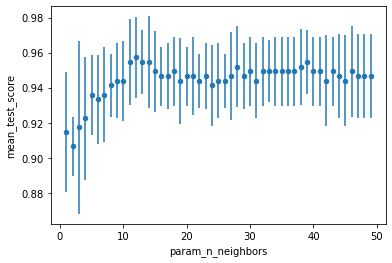

In [3]:
cv_results = pd.DataFrame(clf.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

-  GridSearchCV 一旦它掃描了所有參數，就會使用來自搜索的最佳超參數使用整個訓練數據集進行最終擬合。

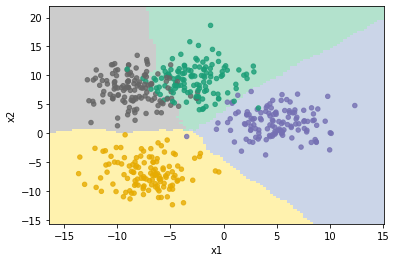

In [4]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(clf, X, y)

In [5]:
new_X = pd.DataFrame({
    "x1": [0, -10, 5, -5],
    "x2": [10, 5, 0, -10],
})

clf.predict(new_X)

array([0, 3, 1, 2])

- 使用 GridSearchCV 之類的東西可以讓你為你的模型找到最好的超參數，同時讓它們最普遍地工作。

In [6]:
clf.score(test_X, test_y)

0.904

## Project

In [8]:
from pandas import DataFrame
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X = DataFrame(load_iris().data, columns=load_iris().feature_names)
X = X[["sepal length (cm)", "sepal width (cm)"]]  # Grab just two of the features
y = load_iris().target

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parameters = {
    "n_neighbors" : range(1, 60),
}
clf = GridSearchCV(model, parameters).fit(train_X, train_y)

In [10]:
cv_results = DataFrame(clf.cv_results_)
cv_results = cv_results.sort_values(["rank_test_score", "mean_test_score"])
cv_results.head()[["param_n_neighbors", "mean_test_score", "std_test_score", "rank_test_score"]]

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
30,31,0.795652,0.056227,1
28,29,0.795257,0.042471,2
39,40,0.795257,0.089407,2
41,42,0.795257,0.070491,2
42,43,0.795257,0.070491,2


<AxesSubplot:xlabel='param_n_neighbors', ylabel='mean_test_score'>

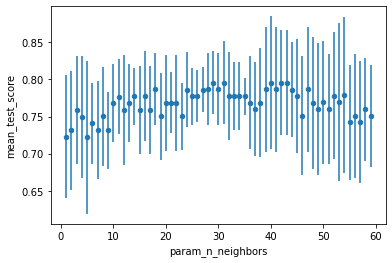

In [11]:
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score")

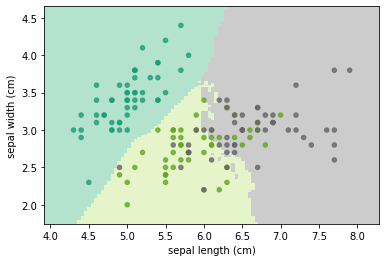

In [12]:
def plot_knn(model, X, y, resolution=100, ax=None):
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd

    x1 = X.iloc[:,0]
    x2 = X.iloc[:,1]
    x1_range = np.linspace(x1.min()*1.1 - x1.max()*0.1, x1.max()*1.1 - x1.min()*0.1, resolution)
    x2_range = np.linspace(x2.min()*1.1 - x2.max()*0.1, x2.max()*1.1 - x2.min()*0.1, resolution)
    grid_x1_values, grid_x2_values = np.meshgrid(x1_range, x2_range)
    x_prime = np.column_stack((grid_x1_values.ravel(), grid_x2_values.ravel()))
    x_prime = pd.DataFrame(x_prime, columns=X.columns)
    y_hat = model.predict(x_prime).reshape(grid_x1_values.shape)

    if ax is None:
        fig, ax = plt.subplots()
    ax.pcolormesh(grid_x1_values, grid_x2_values, y_hat, cmap="Pastel2", alpha=1.0, shading="auto")
    X.plot.scatter(0, 1, c=y, colormap="Dark2", colorbar=False, alpha=0.8, ax=ax)

plot_knn(clf, X, y)

In [13]:
clf.score(test_X, test_y)

0.868421052631579